In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans




In [2]:
#data, clusters = make_blobs(n_samples = 1000, centers = 12, cluster_std = 0.50, random_state = 0)
#make_blobs makes a group of 1000 samples centered around 12 points
#data.shape
#data._get_numeric_data()

In [3]:
data = pd.read_csv('animals.csv')
print("Before dropping ", data.shape)

data['Comments'] = data['Comments'].isna().astype(int)
data.dropna(inplace=True)
#data.drop('Comments', axis=1, inplace=True)    #It 
#print(data.head(15))

X = data._get_numeric_data()
print("After dropping ", X.shape)
ss = StandardScaler()

X = ss.fit_transform(X)

ss = StandardScaler()

X = ss.fit_transform(X)

Before dropping  (344, 10)
After dropping  (330, 7)


In [4]:
bm = Birch(branching_factor = 50, n_clusters = 3, threshold = 1)
#Threshold – The maximum number of data samples to be considered in a  subcluster of the leaf node in a CF tree.
#Branching_factor – It is the factor that is used to specify the number of CF sub-clusters that can be made in a node
#N_clusters – number of clusters

In [5]:
bm.fit(X)


Birch(threshold=1)

In [6]:
pred = bm.predict(X);

Text(0, 0.5, 'Culmen Depth')

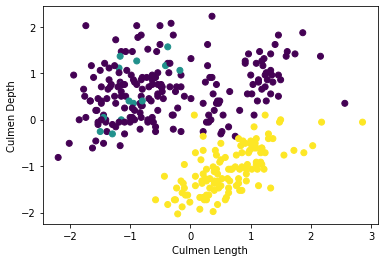

In [7]:
plt.scatter(X[:, 0], X[:, 1], c = pred)

plt.xlabel('Culmen Length') 
plt.ylabel('Culmen Depth') 

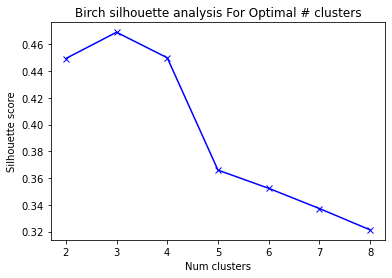

In [8]:

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise birch model
    bm = Birch(branching_factor = 1000, n_clusters = num_clusters, threshold = 1)
    bm.fit(X)
    cluster_labels = bm.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    

plt.plot(range_n_clusters, silhouette_avg,'bx-')
plt.xlabel('Num clusters') 
plt.ylabel('Silhouette score') 
plt.title('Birch silhouette analysis For Optimal # clusters')
plt.show()

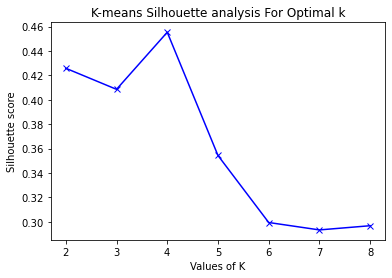

In [9]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters, silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('K-means Silhouette analysis For Optimal k')
plt.show()

In [10]:
silhouette_avg

[0.4257932103544568,
 0.4085426826893314,
 0.45530142474950847,
 0.3543567362580424,
 0.2994767126899417,
 0.2934039680990199,
 0.2968408630620759]